# Ch5. 합성곱 신경망 이미지 분석

아래 코딩문은 구글 코랩에서 실행 필요.
데이터셋을 불러오는 자세한 과정은 책 본문 가이드라인 참조

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 구글 드라이브에 미리 올린 압축파일을 풀기 위해 라이브러리를 불러오기
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Data/fruits-360-5.zip', 'r') # 압축 파일(zip file) 읽
zip_ref.extractall('/content/drive/MyDrive/Data/') # 압출 파일을 풀어서 지정한 폴더(예: Data 폴더)에 저장
zip_ref.close()

In [ ]:
# 기본 라이브러리 불러오기 
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

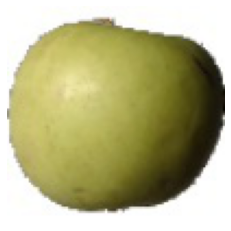

In [ ]:
img = tf.keras.preprocessing.image.load_img\
('/content/drive/MyDrive/Data/fruits-360-5/Training/Apple Golden 3/0_100.jpg')
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# 구글 드라이브에 올려둔 학습 데이터셋와 테스트 데이터셋의 경로를 저장
train_data_dir = '/content/drive/MyDrive/Data/fruits-360-5/Training'
test_data_dir = '/content/drive/MyDrive/Data/fruits-360-5/Test'

In [ ]:
# 배치 사이즈를 32로 지정 
# 원 데이터 출처에서 제공된 정보에 기반하여 Image size를 100x100 pixels로 지정 
batch_size = 32
img_height = 100
img_width = 100

In [ ]:
# 원본 학습 데이터셋을 불러오기
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.3,
  subset="training",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2389 files belonging to 5 classes.
Using 1673 files for training.


In [ ]:
# 원본 학습 데이터넷에서 검증 데이터셋을 분리
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.3,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2389 files belonging to 5 classes.
Using 716 files for validation.


In [ ]:
# 불러온 학습 데이터엣에서 레이블 값(여기서는 5개 사과 품종)을 확인 
class_names = train_ds.class_names
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3']


In [ ]:
# 원본 테스트 데이터셋 불러오기
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 797 files belonging to 5 classes.


In [ ]:
# 원본 테서트 데이터셋을 shuffle=False 옵션 추가하여 데이터셋 test_ds1을 별도로 생성
test_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=False)

Found 797 files belonging to 5 classes.


In [ ]:
type(test_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
# test_ds에서 레이블 정보만 추출하여 y에 저장 
# 이 코딩문은 실행할 때마다 y 배열이 변경됨에 주의
y = np.concatenate([y for x, y in test_ds], axis=0)
print(y)

[3 1 3 0 1 1 4 2 2 3 0 1 2 3 2 3 0 1 1 1 1 4 4 1 3 2 2 0 0 1 4 3 0 3 0 3 3
 4 4 3 4 0 4 1 0 4 3 3 2 4 0 3 3 0 4 1 0 4 2 1 0 1 1 1 4 0 1 4 0 4 4 3 3 3
 0 3 0 2 3 2 0 4 3 0 3 3 3 0 1 2 2 2 3 4 0 4 3 0 2 4 4 2 4 0 2 2 1 4 0 4 0
 4 2 1 4 2 2 4 3 1 3 1 2 0 0 4 3 1 2 3 1 4 2 4 3 4 1 0 1 3 4 2 2 3 3 0 2 4
 0 1 3 4 0 3 4 3 0 1 2 1 4 4 1 0 3 0 0 2 3 3 2 1 0 3 0 3 4 3 1 3 2 0 2 3 1
 4 4 2 1 0 3 3 1 2 2 1 3 0 2 2 4 2 4 0 2 2 2 0 2 1 1 1 3 0 2 0 3 1 4 4 2 1
 3 3 2 1 4 3 0 0 4 0 3 2 1 4 0 0 0 2 4 3 4 0 4 3 3 0 4 0 2 0 1 2 4 3 1 4 0
 3 4 4 2 3 4 0 0 0 1 1 0 3 0 1 4 4 2 3 0 4 4 2 0 4 2 2 0 4 4 3 0 1 3 1 1 2
 0 4 4 2 2 1 1 0 0 3 0 1 3 0 0 2 3 3 4 0 3 0 2 2 3 1 2 1 0 1 2 1 2 2 3 3 2
 0 0 1 0 2 4 1 4 0 1 2 0 0 2 2 0 3 3 1 2 0 4 1 3 1 1 1 1 3 3 2 1 4 4 3 2 0
 2 0 3 3 3 0 0 3 4 2 4 2 2 3 1 1 0 3 3 4 0 4 4 2 2 1 0 1 3 1 4 1 1 0 4 3 4
 0 4 3 3 0 4 2 4 0 1 1 4 4 3 2 0 4 4 4 3 2 3 1 4 0 4 1 4 4 4 3 4 0 4 4 1 2
 4 2 4 4 1 4 0 4 4 3 2 2 2 1 2 3 4 4 1 0 1 3 4 2 1 4 0 0 2 3 2 0 2 3 3 2 2
 0 2 2 3 3 4 3 0 2 1 3 1 

In [ ]:
# 반면에 아래 코딩문은 Shuffle=False 옵션을 통해 불러온 test_ds1을 대상으로 
# 때문에 코딩문을 여러 번 실행해도 결과가 변하지 않음

In [ ]:
# test_ds1에서 레이블 정보만 추출하여 y에 저장 
y = np.concatenate([y for x, y in test_ds1], axis=0)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
# 참조 코딩
print(y[0]) #np.ndarray의 처음 항목을 출력

0


In [ ]:
# 참조 코딩
print(y[-1]) #np.ndarray의 마지막 항목을 출력

4


In [ ]:
# 참조 코딩
print(y[796])

4


In [ ]:
# test_ds1에서 이미지 정보만 추출하여 x에 저장 

x = np.concatenate([x for x, y in test_ds1], axis=0)
print(x[0])

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


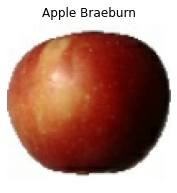

In [ ]:
# test_ds1의 첫번째 이미지와 레이블을 불러와 그림으로 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(x[0].astype("uint8"))
plt.title(class_names[y[0]])
plt.axis("off")
plt.show()

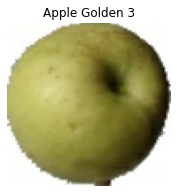

In [ ]:
# test_ds1의 마지막 이미지와 레이블을 불러와 그림으로 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(x[-1].astype("uint8"))
plt.title(class_names[y[-1]])
plt.axis("off")
plt.show()

In [ ]:
# test_ds1을 제외하고 위에서 불러온 세가지 데이터셋을 Prefetch 데이터셋으로 설정
BUFFER_SIZE = 10000
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(BUFFER_SIZE).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
# 합성곱 신경망(CNN) 모델 구성

num_classes = 5  # 레이블 값의 개수, 즉 사과 품종의 개수
from tensorflow.keras import layers

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2),
  layers.Dropout(.50),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(2),
  layers.Dropout(.50),
  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.Dropout(.50),
  layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 25, 25, 32)       

In [ ]:
# 모델을 컴파일
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
# 모델을 학습
# 텐서플로 케라스 신경망 모델은 매번 실행시 모델 결과가 조금씩 다를 수 있음에 유의

from tensorflow import keras
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('CNNClassifier.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy',
                                                  restore_best_weights=True)
epochs = 20

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = [checkpointer, early_stopping_cb]
  )

Epoch 1/20
53/53 [==============================] - 20s 364ms/step - loss: 1.3143 - accuracy: 0.5613 - val_loss: 1.2108 - val_accuracy: 0.4399
Epoch 2/20
53/53 [==============================] - 19s 363ms/step - loss: 0.3098 - accuracy: 0.8739 - val_loss: 0.8740 - val_accuracy: 0.5461
Epoch 3/20
53/53 [==============================] - 19s 364ms/step - loss: 0.1312 - accuracy: 0.9611 - val_loss: 0.7764 - val_accuracy: 0.6844
Epoch 4/20
53/53 [==============================] - 19s 365ms/step - loss: 0.0681 - accuracy: 0.9779 - val_loss: 0.4852 - val_accuracy: 0.8170
Epoch 5/20
53/53 [==============================] - 19s 364ms/step - loss: 0.0240 - accuracy: 0.9946 - val_loss: 0.3882 - val_accuracy: 0.8520
Epoch 6/20
53/53 [==============================] - 19s 364ms/step - loss: 0.0534 - accuracy: 0.9785 - val_loss: 0.4101 - val_accuracy: 0.8073
Epoch 7/20
53/53 [==============================] - 19s 363ms/step - loss: 0.0179 - accuracy: 0.9946 - val_loss: 0.1193 - val_accuracy: 0.9637

In [ ]:
# 참조 코딩
len(history.history['val_accuracy'])

14

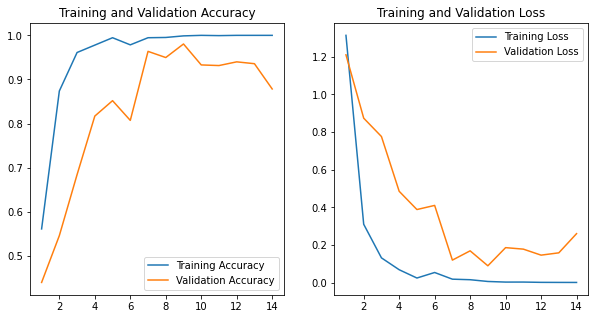

In [ ]:
# 매 epochs마다 모델 정확도와 손실을 그래프로 그리기

acc = history.history['accuracy']         # 모델의 학습 정확도를 변수 acc에 저장  
val_acc = history.history['val_accuracy'] # 모델의 검증 정확도를 변수 val_acc에 저장

loss=history.history['loss']              # 모델의 학습 손실을 변수 loss에 저장  
val_loss=history.history['val_loss']      # 모델의 검증 손실을 변수 val_loss에 저장    

# epochs가 14회가 아닌 다른 결과(예:10회)로 나오면 아래 줄 14를 해당 숫자인 10로 바꿔주야 함에 유의
epochs_range = range(1, 14+1)             # epochs가 14회까지만 수행된 것을 반영

# 학습 정확도와 검증 정확도를 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# 학습 손실와 검증 손실을 그리기
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# model.fit() 실행시 검증 정확도가 가장 높은 에포크에 해당하는 모델 가중치 계수들을 불러오기
model.load_weights('CNNClassifier.h5')

In [ ]:
# 데이터셋 test_ds를 사용하여 모델을 평가

test_loss, test_acc = model.evaluate(test_ds)

print("test loss: ", test_loss)
print()
print("test accuracy: ", test_acc)

25/25 [==============================] - 2s 91ms/step - loss: 0.3526 - accuracy: 0.8657
test loss:  0.3526283800601959

test accuracy:  0.8657465577125549


In [ ]:
# 특정 이미지의 레이블을 예측하기 위해서 test_ds1을 사용하여 예측을 실시
# test_ds1의 첫번째 이미지의 예측 결과
predictions = model.predict(test_ds1)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Apple Braeburn with a 40.46 percent confidence.


In [ ]:
# test_ds1의 마지막 이미지의 예측 결과
score = tf.nn.softmax(predictions[-1])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Apple Golden 3 with a 37.49 percent confidence.
